# Download the current version of GMCNN pipeline from GitHub

In [1]:
!git clone https://github.com/tlatkowski/inpainting-gmcnn-keras.git

Cloning into 'inpainting-gmcnn-keras'...
remote: Enumerating objects: 393, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 393 (delta 6), reused 1 (delta 1), pack-reused 378
Receiving objects: 100% (393/393), 7.77 MiB | 14.76 MiB/s, done.
Resolving deltas: 100% (208/208), done.


In [2]:
!ls

inpainting-gmcnn-keras	sample_data


# Download and extract NVIDIA's testing mask dataset

In [3]:
!wget http://masc.cs.gmu.edu/wiki/uploads/partialconv/mask.zip
!unzip -q mask.zip

--2021-04-28 09:32:05--  http://masc.cs.gmu.edu/wiki/uploads/partialconv/mask.zip
Resolving masc.cs.gmu.edu (masc.cs.gmu.edu)... 129.174.125.37
Connecting to masc.cs.gmu.edu (masc.cs.gmu.edu)|129.174.125.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45168987 (43M) [application/zip]
Saving to: ‘mask.zip’

mask.zip            100%[===================>]  43.08M  10.4MB/s    in 13s     

2021-04-28 09:32:19 (3.21 MB/s) - ‘mask.zip’ saved [45168987/45168987]



In [4]:
!ls

inpainting-gmcnn-keras	mask  mask.zip	sample_data


# Download and extract dataset with training images

We use a dataset picture compressed in **ZIP** formart.

Created by **Jordan Sparks**, CEO of **OregonCryo**, and uncompressed in **Colab** Dir for only training purpouses.
At future we need better samples of high quality standar
of well preserved brain tissue of main species (Humans, pets, farms) for better specfic computational reconstruction.

**ALERT**: We need a **private cloud** for storing pictures and masks datasets for every project of brain reconstruction.

In [5]:
!wget www.oregoncryo.com/ElectronMicrographs.zip
!unzip -q ElectronMicrographs.zip
!mkdir images 
!cp -a ElectronMicrographs/ images

--2021-04-28 09:32:34--  http://www.oregoncryo.com/ElectronMicrographs.zip
Resolving www.oregoncryo.com (www.oregoncryo.com)... 64.29.151.221
Connecting to www.oregoncryo.com (www.oregoncryo.com)|64.29.151.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91135741 (87M) [application/zip]
Saving to: ‘ElectronMicrographs.zip’

ElectronMicrographs 100%[===================>]  86.91M  5.49MB/s    in 25s     

2021-04-28 09:33:00 (3.43 MB/s) - ‘ElectronMicrographs.zip’ saved [91135741/91135741]



In [6]:
!ls -l

total 133132
drwxr-xr-x  7 root root     4096 Apr 28 09:33 ElectronMicrographs
-rw-r--r--  1 root root 91135741 Jun 29  2014 ElectronMicrographs.zip
drwxr-xr-x  3 root root     4096 Apr 28 09:33 images
drwxr-xr-x 14 root root     4096 Apr 28 09:30 inpainting-gmcnn-keras
drwxr-xr-x  3 root root     4096 Aug 11  2018 mask
-rw-r--r--  1 root root 45168987 Aug 11  2018 mask.zip
drwxr-xr-x  1 root root     4096 Apr 21 13:39 sample_data


# Install all requirements

In [11]:
!pip install -r inpainting-gmcnn-keras/requirements/requirements.txt
!pip install tensorflow-gpu==1.15.0
!pip install tensorflow-cpu==1.15.0

     |████████████████████████████████| 110.8MB 102kB/s 


In [2]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2021-04-28 09:35:31--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.200.34.95, 35.174.24.146, 52.204.138.61, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.200.34.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13828408 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  5.67MB/s    in 2.3s    

2021-04-28 09:35:35 (5.67 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13828408/13828408]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [12]:
LOG_DIR = './outputs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [13]:
get_ipython().system_raw('./ngrok http 6006 &')

In [14]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://05bce291edbe.ngrok.io


In [15]:
!mkdir config
!cp inpainting-gmcnn-keras/config/main_config.ini config

mkdir: cannot create directory ‘config’: File exists


In [16]:
%%writefile config/main_config.ini
[TRAINING]
WGAN_TRAINING_RATIO = 1
NUM_EPOCHS = 5
BATCH_SIZE = 4
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_CHANNELS = 3
LEARNING_RATE = 0.0001
SAVE_MODEL_STEPS_PERIOD = 1000

[MODEL]
ADD_MASK_AS_GENERATOR_INPUT = True
GRADIENT_PENALTY_LOSS_WEIGHT = 10
ID_MRF_LOSS_WEIGHT = 0.05
ADVERSARIAL_LOSS_WEIGHT = 0.001
NN_STRETCH_SIGMA = 0.5
VGG_16_LAYERS = 3,6,10
ID_MRF_STYLE_WEIGHT = 1.0
ID_MRF_CONTENT_WEIGHT = 1.0
NUM_GAUSSIAN_STEPS = 3
GAUSSIAN_KERNEL_SIZE = 32
GAUSSIAN_KERNEL_STD = 40.0

Overwriting config/main_config.ini


In [17]:
!ls

config			 inpainting-gmcnn-keras  ngrok-stable-linux-amd64.zip
ElectronMicrographs	 mask			 sample_data
ElectronMicrographs.zip  mask.zip
images			 ngrok


# Train generator with only confidence reconstruction loss for 5 epochs

In [18]:
!python inpainting-gmcnn-keras/runner.py --train_path images --mask_path mask --experiment_name "gmcnn256x256" -warm_up_generator

Using TensorFlow backend.



INFO:tensorflow:Setting visible GPU to 0
INFO:tensorflow:Performing generator training only with the reconstruction loss.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
multiply_1 (Multiply)           (None, 256, 256, 3)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
______________________________________________________

# Visualize predicted images for specific training steps in warm-up generator mode

In [19]:
!ls outputs/gmcnn256x256/predicted_pics/warm_up_generator/

step_000.png


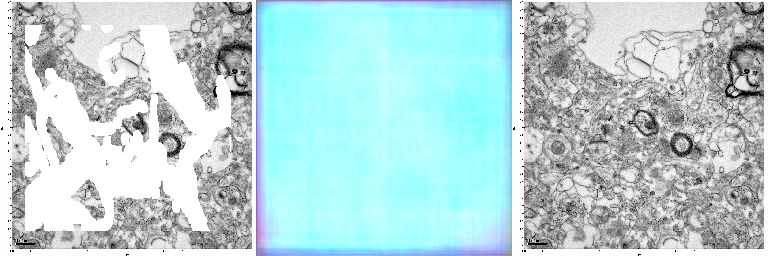

In [21]:
from IPython.display import Image
Image('outputs/gmcnn256x256/predicted_pics/warm_up_generator/step_000.png')

# Full Wasserstein GAN training mode: generator, local and global discriminators

In [22]:
%%writefile config/main_config.ini
[TRAINING]
WGAN_TRAINING_RATIO = 5
NUM_EPOCHS = 5
BATCH_SIZE = 4
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_CHANNELS = 3
LEARNING_RATE = 0.0002
SAVE_MODEL_STEPS_PERIOD = 500

[MODEL]
ADD_MASK_AS_GENERATOR_INPUT = True
GRADIENT_PENALTY_LOSS_WEIGHT = 10
ID_MRF_LOSS_WEIGHT = 0.05
ADVERSARIAL_LOSS_WEIGHT = 0.0005
NN_STRETCH_SIGMA = 0.5
VGG_16_LAYERS = 3,6,10
ID_MRF_STYLE_WEIGHT = 1.0
ID_MRF_CONTENT_WEIGHT = 1.0
NUM_GAUSSIAN_STEPS = 3
GAUSSIAN_KERNEL_SIZE = 32
GAUSSIAN_KERNEL_STD = 40.0

Overwriting config/main_config.ini


In [23]:
!python inpainting-gmcnn-keras/runner.py --train_path images --mask_path mask -from_weights --experiment_name "gmcnn256x256"

Using TensorFlow backend.



INFO:tensorflow:Setting visible GPU to 0



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
multiply_1 (Multiply)           (None, 256, 256, 3)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (Non

# Vizualise results of full model training

In [ ]:
!ls outputs/gmcnn256x256/predicted_pics/wgan/

ls: cannot access 'outputs/gmcnn256x256/predicted_pics/wgan/': No such file or directory


In [ ]:
Image('outputs/gmcnn256x256/predicted_pics/wgan/step_1000.png')

In [ ]:
Image('outputs/gmcnn256x256/predicted_pics/wgan/step_2000.png')

# Create zip file with model results and checkpoints

In [ ]:
!zip -r outputs.zip outputs

	zip warning: name not matched: outputs

zip error: Nothing to do! (try: zip -r outputs.zip . -i outputs)


In [ ]:
ls

config/                  inpainting-gmcnn-keras/  ngrok-stable-linux-amd64.zip
ElectronMicrographs/     mask/                    sample_data/
ElectronMicrographs.zip  mask.zip
images/                  ngrok*


In [ ]:
!rm -rf outputs/

In [ ]:
!python inpainting-gmcnn-keras/runner.py --train_path images --mask_path mask -warm_up_generator -from_weights

Using TensorFlow backend.
2021-04-28 09:25:25.701354: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "inpainting-gmcnn-keras/runner.py", line 8, in <module>
    from models import gmcnn_gan
  File "/content/inpainting-gmcnn-keras/models/gmcnn_gan.py", line 8, in <module>
    from layers.losses import wasserstein_loss, gradient_penalty_loss, \
  File "/content/inpainting-gmcnn-keras/layers/losses.py", line 6, in <module>
    from utils import id_mrf
  File "/content/inpainting-gmcnn-keras/utils/id_mrf.py", line 8, in <module>
    log = training_utils.get_logger()
  File "/content/inpainting-gmcnn-keras/utils/training_utils.py", line 48, in get_logger
    log = tf.logging
AttributeError: module 'tensorflow' has no attribute 'logging'


In order to download model result go to: Files -> content, right click on outputs.zip -> Download